In [1]:
import bpy
from IPython.display import display, Image

def fresh_scene(keep_cube=False):
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    
    # Select all objects except cameras and optionally the default cube
    for obj in bpy.context.scene.objects:
        if obj.type == 'CAMERA':
            obj.select_set(False)
        elif obj.name == 'Cube' and keep_cube:
            obj.select_set(False)
        else:
            obj.select_set(True)
    
    bpy.ops.object.delete()
    
    # Add light
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.object

    sun.location = (0, 0, 0)
    from math import radians
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 5  

def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png"))

bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

In [2]:
bpy.ops.wm.open_mainfile(filepath="dna.blend")

{'FINISHED'}

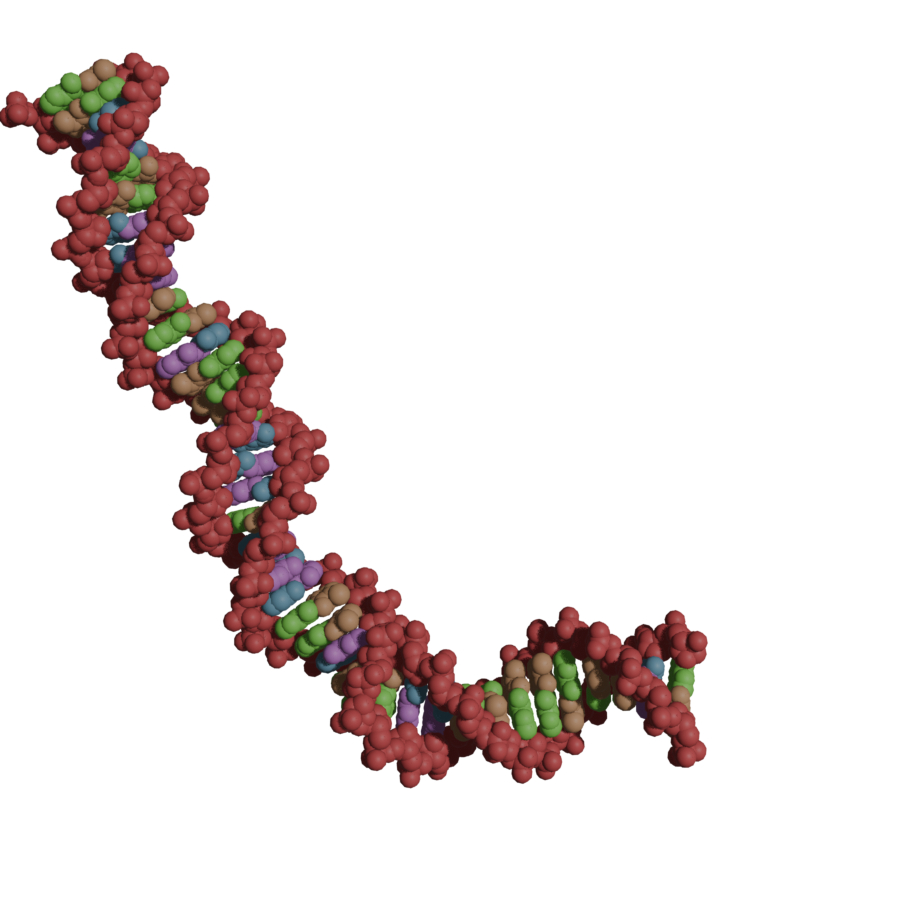

In [3]:
# Constants
SCALE_FACTOR = 0.01
COLLECTION_NAME = "NewCurve"
RENDER_PATH = "test2.png"

def scale_down_points(points, scale_factor=SCALE_FACTOR):
    return [(x * scale_factor, y * scale_factor) for x, y in points]

def clear_previous_curve(collection_name):
    collection = bpy.data.collections.get(collection_name)
    if collection:
        for obj in collection.objects:
            bpy.data.objects.remove(obj, do_unlink=True)

def create_curve_from_points(points):
    clear_previous_curve(COLLECTION_NAME)
    curve_data = bpy.data.curves.new(name='Curve', type='CURVE')
    curve_data.dimensions = '3D'
    curve_data.fill_mode = 'FULL'
    
    # Create a new spline in that curve
    polyline = curve_data.splines.new('POLY')
    polyline.points.add(len(points) - 1)
    
    # Assign points to the spline
    for i, (x, y) in enumerate(points):
        polyline.points[i].co = (x, y, 0, 1)  # Z-axis is set to 0, W to 1
    
    # Create an object with the curve data
    curve_obj = bpy.data.objects.new('CurveObject', curve_data)
    
    # Link the curve object to the collection
    collection = bpy.data.collections.get(COLLECTION_NAME)
    collection.objects.link(curve_obj)
    
    return curve_obj

coord_data = [
    {"x": 10, "y": 10},
    {"x": 50.5, "y": 100.5},
    {"x": 100.5, "y": 100.5},
]


points = [(item['x'], -item['y']) for item in coord_data]
scaled_points = scale_down_points(points)

# Create the curve in Blender
curve = create_curve_from_points(scaled_points)

# Apply the Geometry Nodes modifier
modifier = curve.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = bpy.data.node_groups["dna_node_setup"]

render_result()

In [4]:
# install with !uv pip install tldraw
from tldraw import TldrawSetImage
widget = TldrawSetImage()
widget

TldrawSetImage(image_dimensions=(0, 0))

In [6]:
widget.coord

[{'x': 42.53125, 'y': 27.90625, 'z': 0.5},
 {'x': 42.53125, 'y': 28.15625, 'z': 0.5},
 {'x': 42.53125, 'y': 29.74625, 'z': 0.5},
 {'x': 42.53125, 'y': 40.22625, 'z': 0.5},
 {'x': 42.53125, 'y': 54.11625, 'z': 0.5},
 {'x': 42.53125, 'y': 62.86625, 'z': 0.5},
 {'x': 45.57125, 'y': 72.22625, 'z': 0.5},
 {'x': 50.761250000000004, 'y': 74.77625, 'z': 0.5},
 {'x': 58.17125, 'y': 74.77625, 'z': 0.5},
 {'x': 69.68125, 'y': 74.77625, 'z': 0.5},
 {'x': 83.56125, 'y': 74.77625, 'z': 0.5}]

In [7]:
def on_color_change(change):
    coord_data = change['new']  # assuming 'coord' is the observed property
    points = [(item['x'], -item['y']) for item in coord_data]
    scaled_points = scale_down_points(points)
    curve = create_curve_from_points(scaled_points)  
    modifier = curve.modifiers.new(name="GeometryNodes", type='NODES')
    modifier.node_group = bpy.data.node_groups["dna_node_setup"]
    # render_result()  

widget.observe(on_color_change, names='coord')

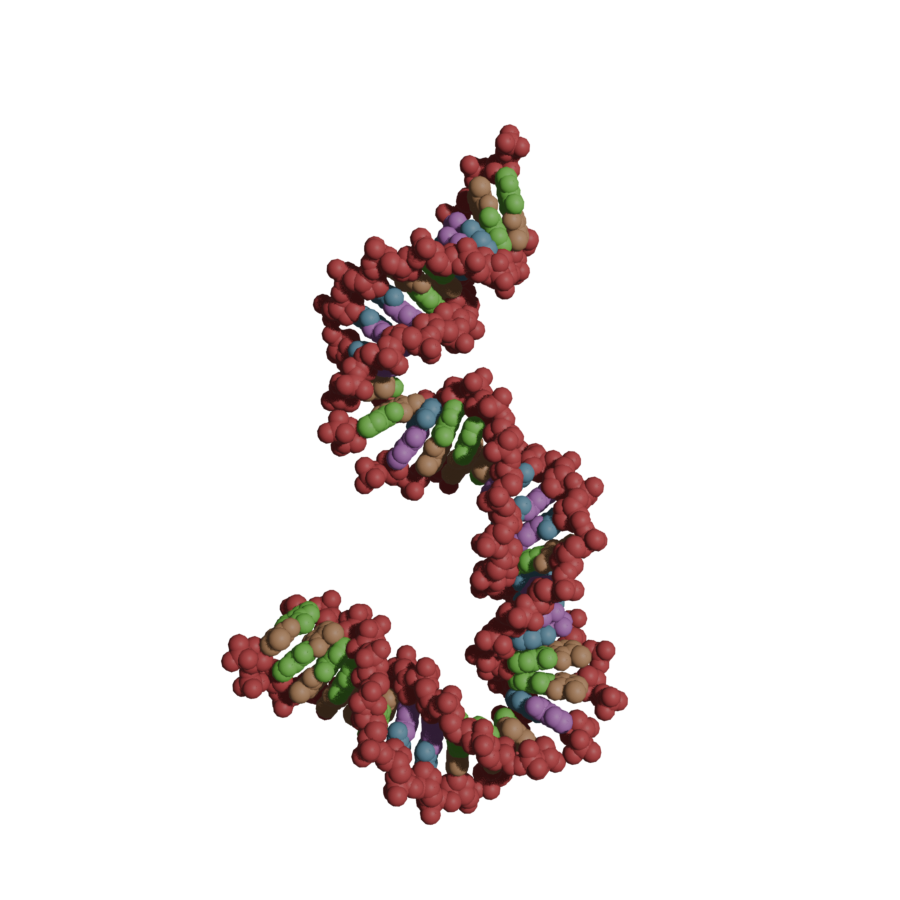

In [8]:
render_result() 